In [1]:
import matplotlib.pyplot as plt
import xarray
from netCDF4 import Dataset 
import os
import cftime

In [2]:
output_file=os.path.expanduser('~')+'/output/ELM_output.nc'

In [3]:
### user inputs for variable NAME, UNIT, scaling, Year starting and ending for plotting

variable_name='GPP'          # user-defined varialbe name in ELM_output.nc to plot
variable_unit='ugC/m2/s'     # user-defined units, '' for that from ELM_output.nc
variable_multiplier=1.e6     # scaling original data by multiplying this scalor
yr_start = 2000              # -9999 for default start year in ELM_output.nc
yr_end = -9999               # -9999 for default end year in ELM_output.nc

In [4]:
print_variable_name=False # print ALL variable names

In [5]:
fnc=Dataset(output_file)
vars=fnc.variables
if print_variable_name: {print(v, vars[v].dimensions) for v in vars}
vars_dims={}; vars_units={};
for v in vars: 
    vars_dims[v]=vars[v].dimensions
    if(hasattr(vars[v], 'units')):
        vars_units[v]=vars[v].units
    else:
        vars_units[v]='-'    
fnc.close()

In [6]:
output=xarray.open_dataset(output_file).squeeze()

In [7]:
if 'time' in vars_dims[variable_name]:
    time = output['time']  ### time dimension, put in unit of years
    if(yr_start!=-9999):
        t0 = cftime.DatetimeNoLeap(yr_start, 1, 1, 0, 0, 0, 0, has_year_zero=True)
        time=time.where(time.time>t0, drop=True)
    if(yr_end!=-9999):
        t1 = cftime.DatetimeNoLeap(yr_end+1, 1, 1, 0, 0, 0, 0, has_year_zero=True)
        time=time.where(time.time<t1, drop=True)
else:
    print("NOT a time-series variable: ", variable_name)
    
if 'levgrnd' in vars_dims[variable_name]:
    soil_depth=output['levgrnd']
    #print(soil_depth)
if 'levdcmp' in vars_dims[variable_name]:
    soil_depth=output['levdcmp']
    #print(soil_depth)
if 'pft' in vars_dims[variable_name]:
    pft_index=output['pft']
    #print(pft_index)

var_data = output[variable_name]*variable_multiplier
if(yr_start!=-9999 and 'time' in vars_dims[variable_name]):
    t0 = cftime.DatetimeNoLeap(yr_start, 1, 1, 0, 0, 0, 0, has_year_zero=True)
    var_data=var_data.where(var_data.time>t0, drop=True)
if(yr_end!=-9999 and 'time' in vars_dims[variable_name]):
    t1 = cftime.DatetimeNoLeap(yr_end+1, 1, 1, 0, 0, 0, 0, has_year_zero=True)
    var_data=var_data.where(var_data.time<t1, drop=True)



if variable_unit=='':
    var_unit = vars_units[variable_name]
    if variable_multiplier!=1: var_unit=str(1.0/variable_multiplier)+var_unit
else:
    var_unit = variable_unit


Text(0, 0.5, 'GPP (ugC/m2/s)')

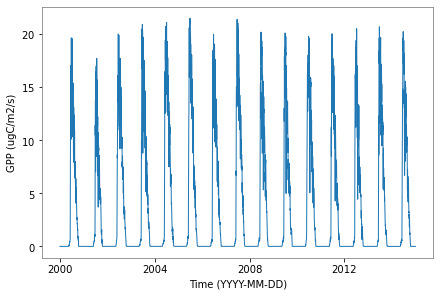

In [8]:
plt.plot(time, var_data, label=variable_name)
plt.xlabel(''.join(['Time (YYYY-MM-DD)']))
plt.ylabel(''.join([variable_name,' (',var_unit, ')']))